In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

In [2]:
#read in data
df = pd.read_csv("predict_results_cnn_biLSTM.csv")
df.head(5)

,tweet_text,true_label,health,vax,gardasil,hpvvaccin,cancer,vaccin,cervicalcanc,studi,learntherisk,hpv,vaccineswork
0,vaccine cuts teen girls ' hpv rates by two-thi...,health,0.994133,0.002311,0.000003,0.000005,0.000003,0.003502,0.000001,3.759640e-05,5.719630e-07,0.000005,1.643450e-08
1,"rt : . vaxxed update ! gardasil tragedy , lead...",hpv,0.000049,0.000454,0.401399,0.000062,0.000156,0.000054,0.000009,2.377150e-07,2.721720e-05,0.597790,8.631390e-08
2,rt : are you another gardasil pusherman ?,gardasil,0.000012,0.001262,0.998460,0.000006,0.000122,0.000027,0.000037,1.737460e-06,3.395300e-05,0.000039,1.325730e-07
3,hpv vaccination rates highest among hispanic g...,"vax, vaccin",0.000088,0.423047,0.000018,0.000006,0.000025,0.576708,0.000038,4.421430e-05,6.985040e-06,0.000018,1.481930e-07
4,rt : online : integrated genomic and molecular...,cervicalcanc,0.000113,0.000213,0.000010,0.000002,0.000057,0.000016,0.999517,2.036460e-05,4.994800e-05,0.000002,6.414090e-10


In [3]:
labels = df['true_label']
labels[:5]

0          health
1             hpv
2        gardasil
3     vax, vaccin
4    cervicalcanc
Name: true_label, dtype: object

In [4]:
l = list(df)
fields = l[2:]
fields

['health',
 'vax',
 'gardasil',
 'hpvvaccin',
 'cancer',
 'vaccin',
 'cervicalcanc',
 'studi',
 'learntherisk',
 'hpv',
 'vaccineswork']

In [5]:
l = []

for i, row in df.iterrows():
    l.append(list(row[h] for h in fields))
#     df['p'][i] = list(row[h] for h in fields))

print(l[1])
df['p'] = pd.Series(l).values
df.head(5)

[4.91146e-05, 0.000453709, 0.401399, 6.1515e-05, 0.00015586200000000002, 5.42637e-05, 8.717039999999999e-06, 2.37715e-07, 2.7217199999999998e-05, 0.5977899999999999, 8.63139e-08]


,tweet_text,true_label,health,vax,gardasil,hpvvaccin,cancer,vaccin,cervicalcanc,studi,learntherisk,hpv,vaccineswork,p
0,vaccine cuts teen girls ' hpv rates by two-thi...,health,0.994133,0.002311,0.000003,0.000005,0.000003,0.003502,0.000001,3.759640e-05,5.719630e-07,0.000005,1.643450e-08,"[0.994133, 0.0023108, 2.58255e-06, 4.69428e-06..."
1,"rt : . vaxxed update ! gardasil tragedy , lead...",hpv,0.000049,0.000454,0.401399,0.000062,0.000156,0.000054,0.000009,2.377150e-07,2.721720e-05,0.597790,8.631390e-08,"[4.91146e-05, 0.000453709, 0.401399, 6.1515e-0..."
2,rt : are you another gardasil pusherman ?,gardasil,0.000012,0.001262,0.998460,0.000006,0.000122,0.000027,0.000037,1.737460e-06,3.395300e-05,0.000039,1.325730e-07,"[1.21391e-05, 0.00126196, 0.99846, 6.12448e-06..."
3,hpv vaccination rates highest among hispanic g...,"vax, vaccin",0.000088,0.423047,0.000018,0.000006,0.000025,0.576708,0.000038,4.421430e-05,6.985040e-06,0.000018,1.481930e-07,"[8.813899999999999e-05, 0.423047, 1.79259e-05,..."
4,rt : online : integrated genomic and molecular...,cervicalcanc,0.000113,0.000213,0.000010,0.000002,0.000057,0.000016,0.999517,2.036460e-05,4.994800e-05,0.000002,6.414090e-10,"[0.00011323899999999999, 0.0002131229999999999..."


In [6]:
df['p'][0]

[0.994133,
 0.0023108,
 2.58255e-06,
 4.69428e-06,
 2.7812299999999997e-06,
 0.00350224,
 1.3169200000000002e-06,
 3.75964e-05,
 5.71963e-07,
 4.7833099999999994e-06,
 1.64345e-08]

In [7]:
data = np.array(df['p'])
d = []
for each in data:
    d.append(np.array(each))
d

[array([  9.94133000e-01,   2.31080000e-03,   2.58255000e-06,
          4.69428000e-06,   2.78123000e-06,   3.50224000e-03,
          1.31692000e-06,   3.75964000e-05,   5.71963000e-07,
          4.78331000e-06,   1.64345000e-08]),
 array([  4.91146000e-05,   4.53709000e-04,   4.01399000e-01,
          6.15150000e-05,   1.55862000e-04,   5.42637000e-05,
          8.71704000e-06,   2.37715000e-07,   2.72172000e-05,
          5.97790000e-01,   8.63139000e-08]),
 array([  1.21391000e-05,   1.26196000e-03,   9.98460000e-01,
          6.12448000e-06,   1.21911000e-04,   2.67171000e-05,
          3.68479000e-05,   1.73746000e-06,   3.39530000e-05,
          3.87943000e-05,   1.32573000e-07]),
 array([  8.81390000e-05,   4.23047000e-01,   1.79259000e-05,
          6.11848000e-06,   2.49509000e-05,   5.76708000e-01,
          3.83986000e-05,   4.42143000e-05,   6.98504000e-06,
          1.77624000e-05,   1.48193000e-07]),
 array([  1.13239000e-04,   2.13123000e-04,   1.03007000e-05,
          

In [8]:
p2 = TSNE(n_components=2, perplexity=50, learning_rate=100.0, n_iter=5000).fit_transform(np.array(d))
p3 = TSNE(n_components=3, perplexity=50, learning_rate=100.0, n_iter=5000).fit_transform(np.array(d))

In [1]:
#save p2, p3
import pickle

def p2f(file, data):
    with open(file, "wb") as fw:
        pickle.dump(data, fw)

def f2p(file):
    obj = None
    with open(file, "rb") as fr:
        obj = pickle.load(fr)
    return obj

In [19]:
file2 = "p2.pkl"
file3 = "p3.pkl"

p2f(file2, p2)
p2f(file3, p3)

NameError: name 'p2' is not defined

In [2]:
p3 = f2p("p3.pkl")

In [ ]:
import matplotlib.pyplot as plt
x = p2[:, 0]
y = p2[:, 1]

plt.scatter(x, y, alpha=0.5)
plt.show()

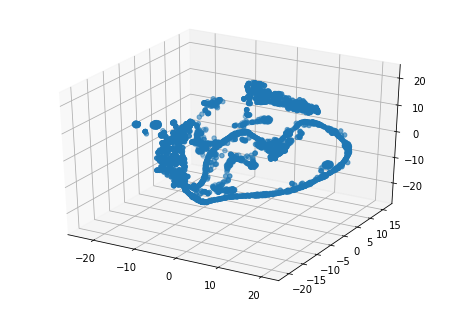

In [4]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

x = p3[:, 0]
y = p3[:, 1]
z = p3[:, 2]

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
pyplot.show()

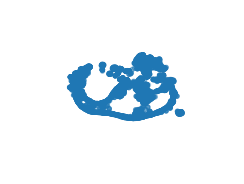

In [13]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
f = ax.scatter(x,y,z)
plt.axis('off')

angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360
 
# create an animated gif (20ms between frames)
rotanimate(ax, angles,'movie.gif',delay=20) 
#rotanimate(ax, angles,'movie.mp4',fps=10,bitrate=2000)

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.png'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files, output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print (command[output_ext])
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])

def make_gif(files, output, delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files), output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
    
    import imageio
    from scipy import misc
    
    d = []
    for each in files:
        d.append(misc.imread(each))
    imageio.mimsave('movie.gif', d)
    
    
    for f in files:
        os.remove(f)